In [20]:
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import cv2
import glob

In [21]:
p = r'D:/thesis/data_shuffled/*/va*.npy'
paths = glob.glob(p)

In [22]:
def imshow(a):
    try:
        a = cv2.normalize(a, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
        a = a.astype(np.uint8)
    except:
        pass
    display(Image.fromarray(a))

In [23]:

def image_grid(array, ncols=4):
    index, height, width, channels = array.shape
    nrows = index//ncols
    
    img_grid = (array.reshape(nrows, ncols, height, width, channels)
              .swapaxes(1,2)
              .reshape(height*nrows, width*ncols, channels))
    
    return img_grid


D:/thesis/data_shuffled\death_valley\validation_images.npy


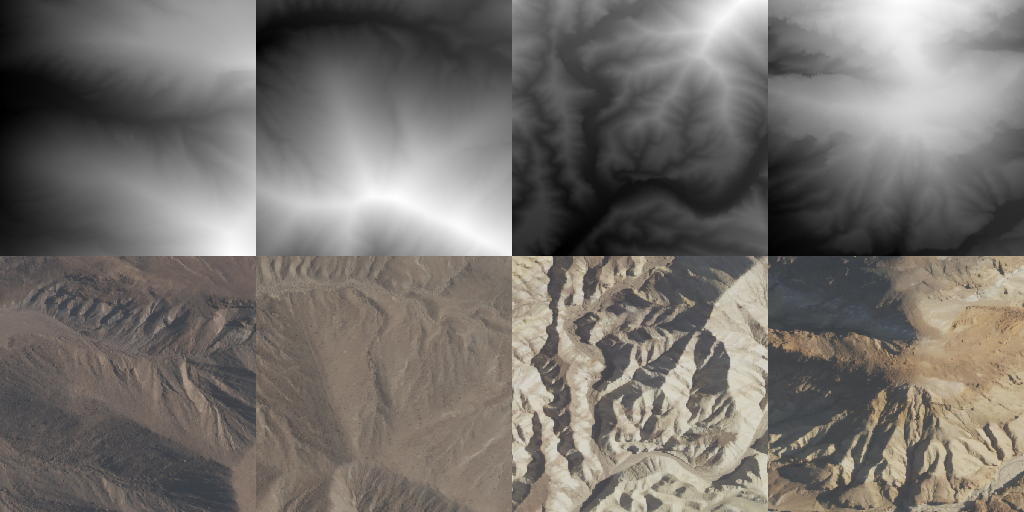

D:/thesis/data_shuffled\laytonville\validation_images.npy


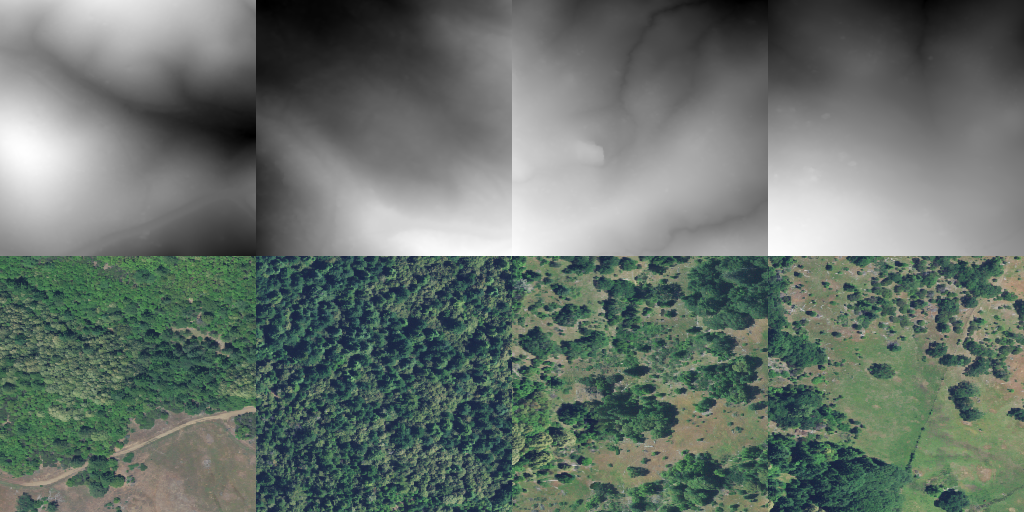

D:/thesis/data_shuffled\mt_rainier\validation_images.npy


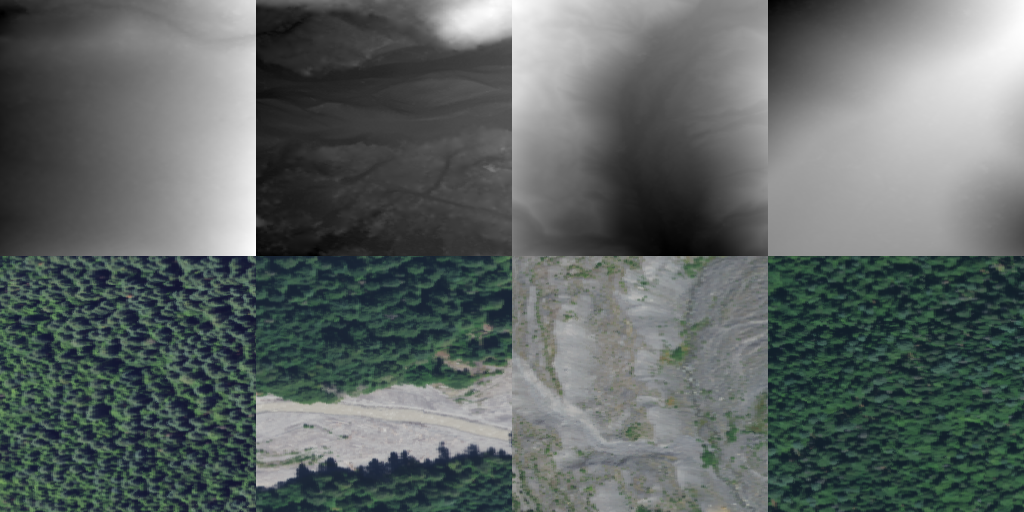

D:/thesis/data_shuffled\post_earthquake\validation_images.npy


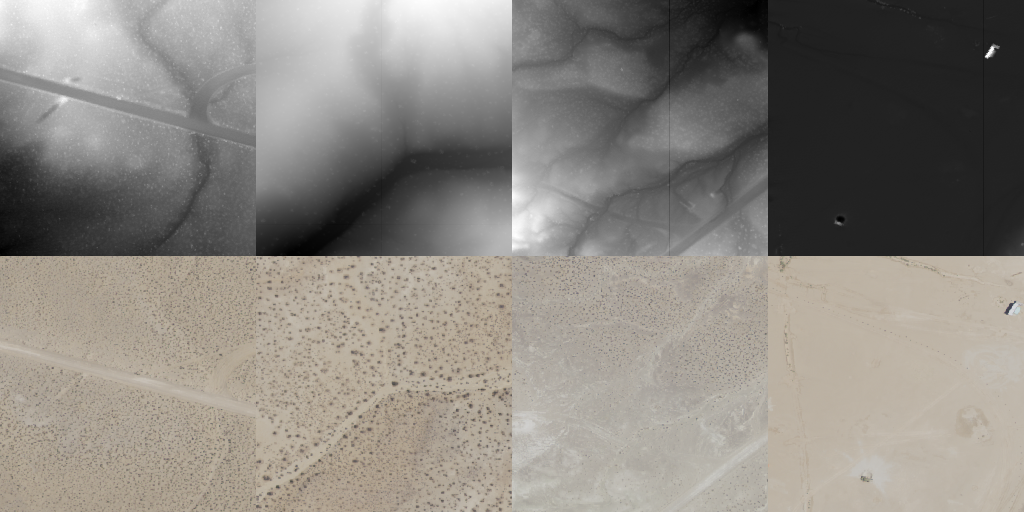

D:/thesis/data_shuffled\river_basin (not aligned well)\validation_images.npy


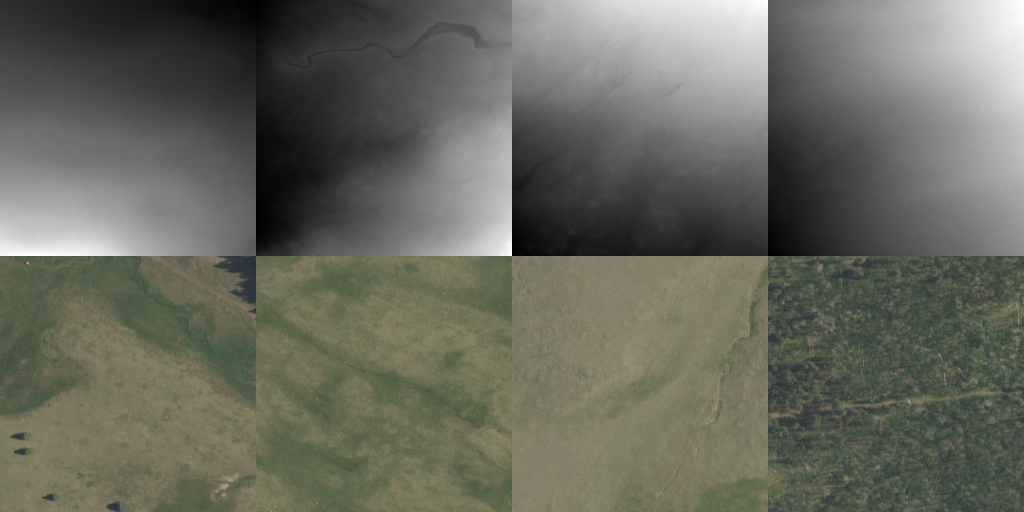

D:/thesis/data_shuffled\san_gabriel\validation_images.npy


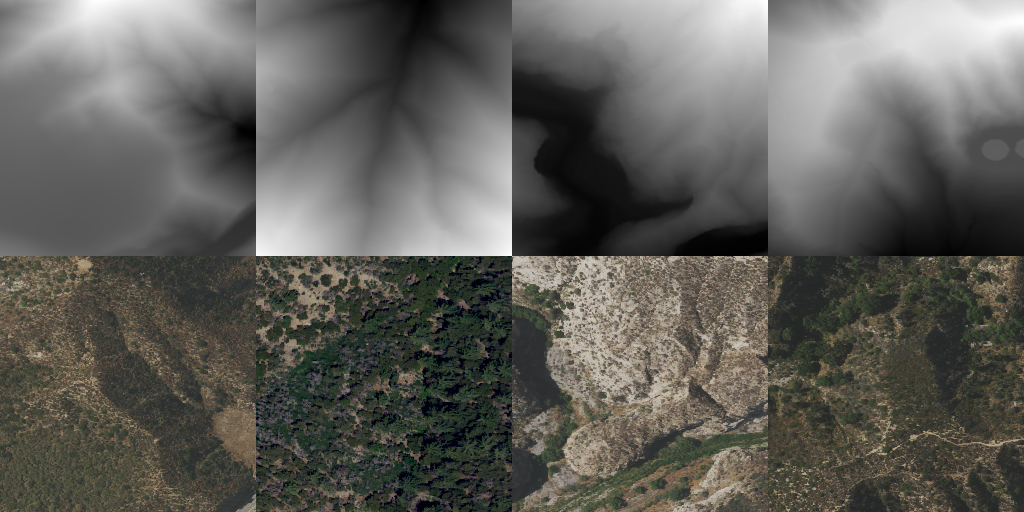

In [24]:
for path_gr, path_im in zip(paths[::2], paths[1::2]):
        print(path_im)
        grid = np.load(path_gr)
        image = np.load(path_im)
        gr = [cv2.normalize(a, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F) for a in grid[-5:-1]]
        gr = np.array([cv2.merge([gray,gray,gray]) for gray in gr])
        arr = np.concatenate((gr, image[-5:-1]), axis=0)
        out = image_grid(arr)
        imshow(out)

In [25]:
paths = glob.glob(f"D:/thesis/raw/data/death*.asc")
# Load the image
img = np.loadtxt(paths[0], skiprows=6)
x = 1000
gray = img[x:900+x,  x:1200+x]

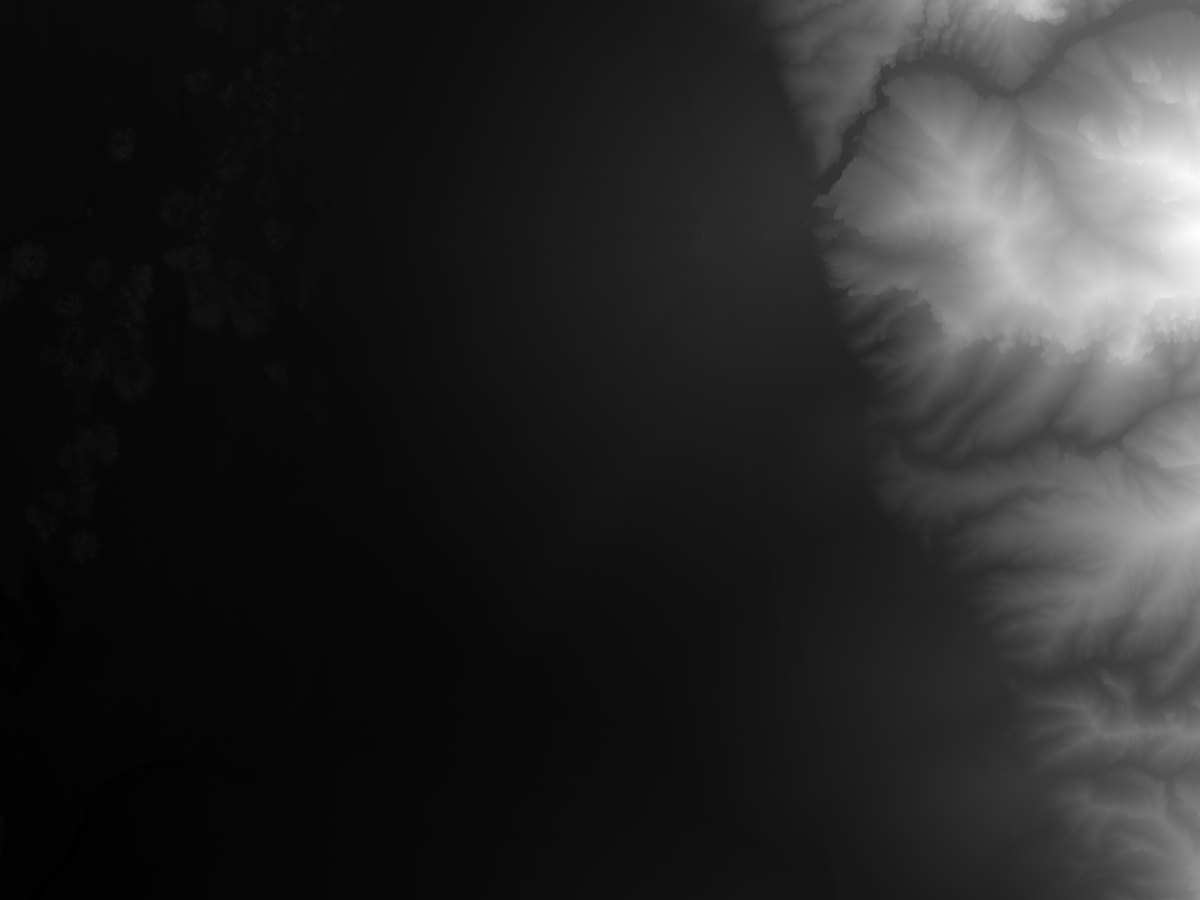

In [26]:
imshow(gray)

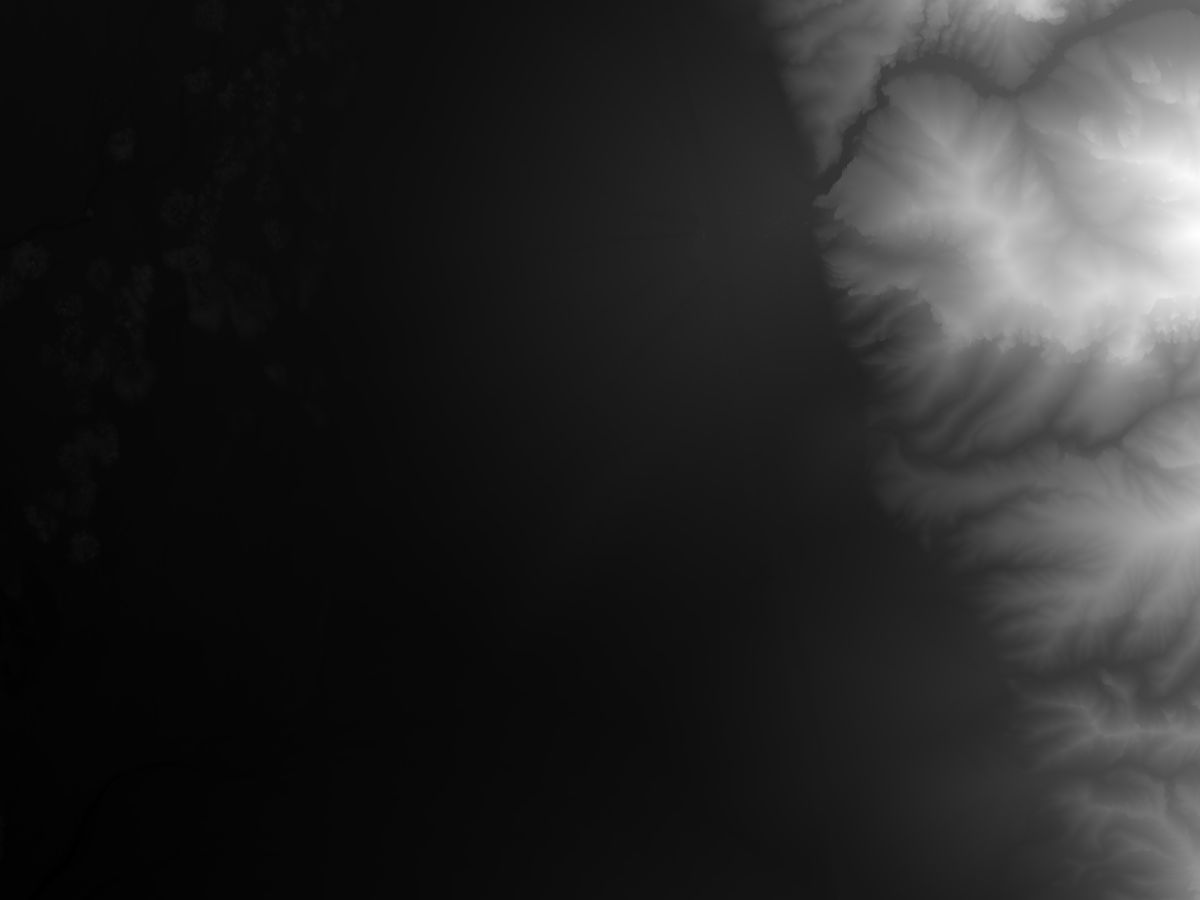

In [27]:
img = cv2.merge([gray,gray,gray])
imshow(img)
# Grid lines at these intervals (in pixels)
# dx and dy can be different


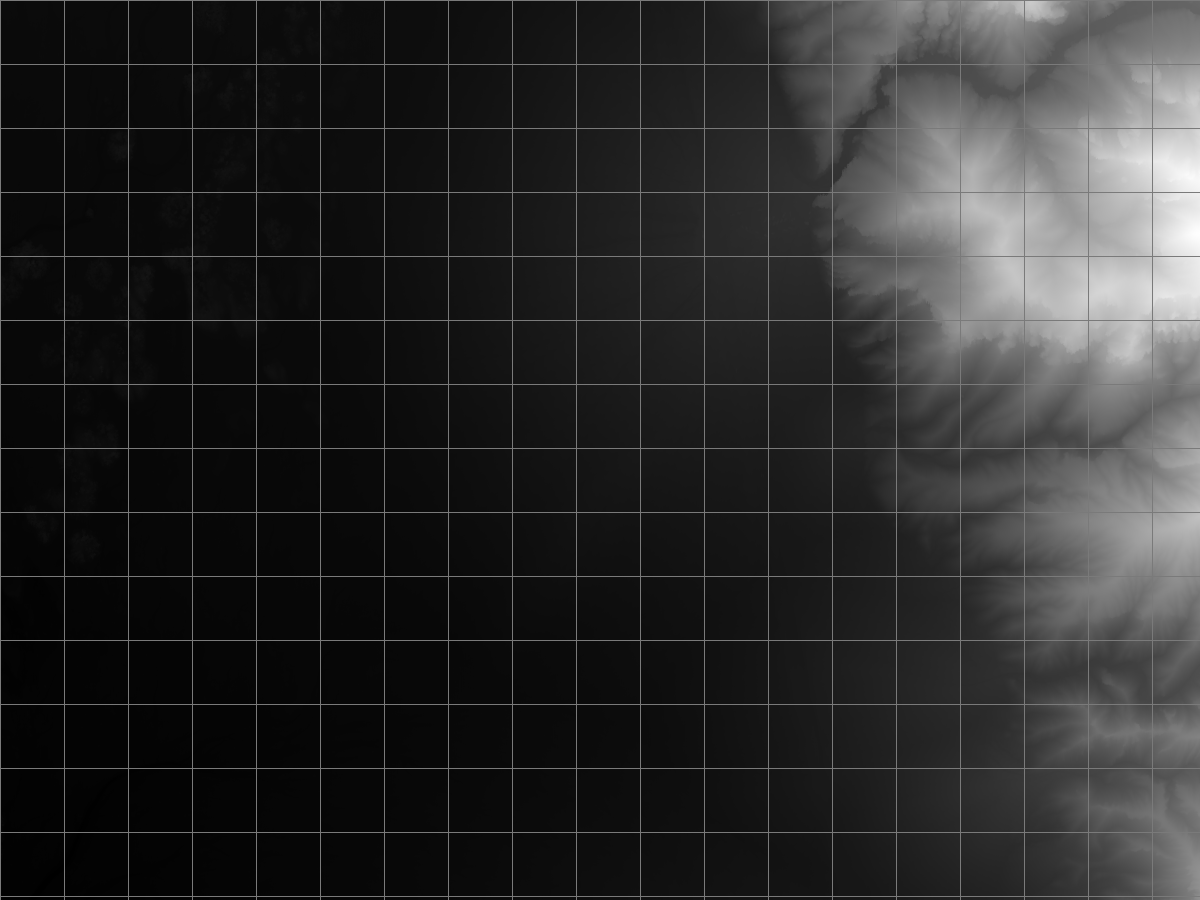

In [28]:
dx, dy = 64,64

# Custom (rgb) grid color
grid_color = [0, 0, 0]

# Modify the image to include the grid
img[:,::dy, :] = grid_color
img[::dx,:, :] = grid_color

# Show the result
imshow(img)

In [29]:
x = img.shape[0] // 64
y = img.shape[1] // 64
ile = (x * y) 

In [30]:
train = 0.8
val = 0.1
coords = np.array(np.meshgrid([64 * _ for _ in range(x)], [64 * _ for _ in range(y)])).T.reshape(-1, 2)
np.random.shuffle(coords)
train_coords, validate_coords, test_coords = np.split(coords, [int(len(coords)*train), int(len(coords)*(train+val))])

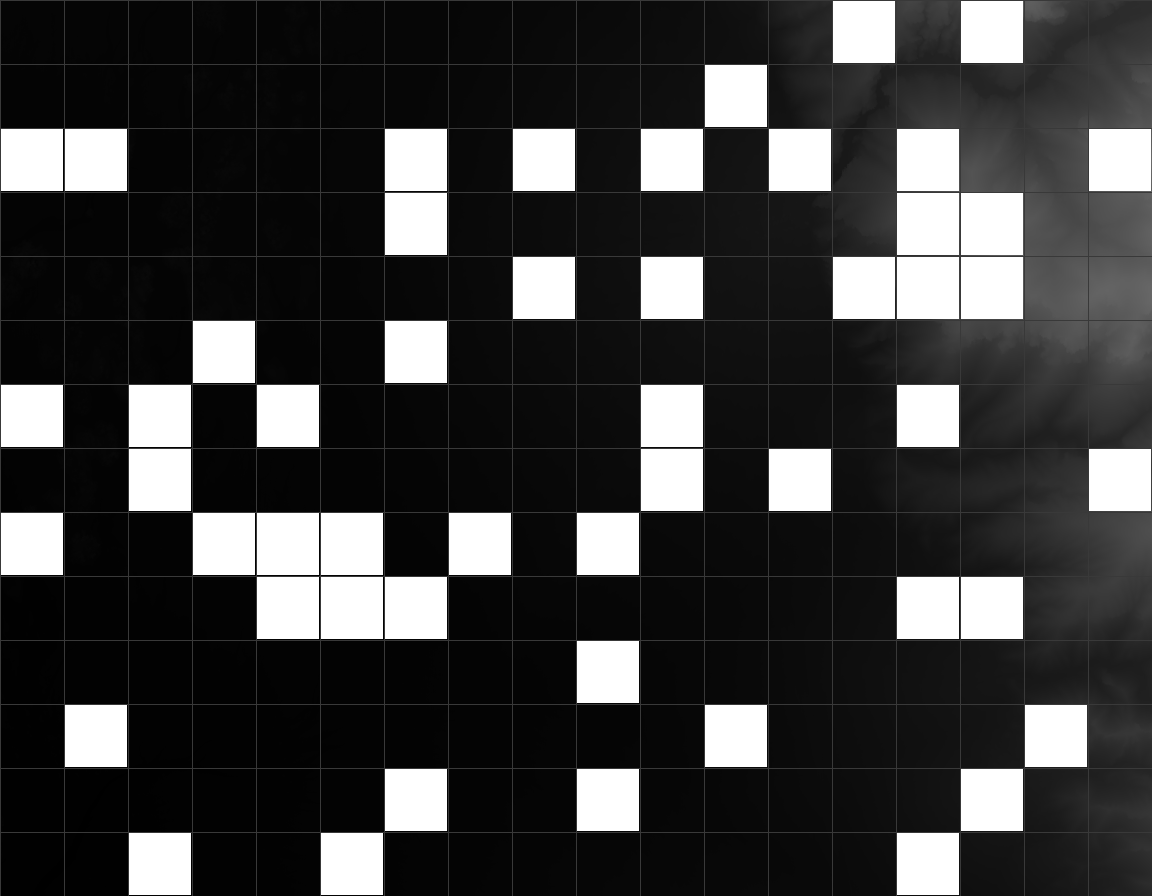

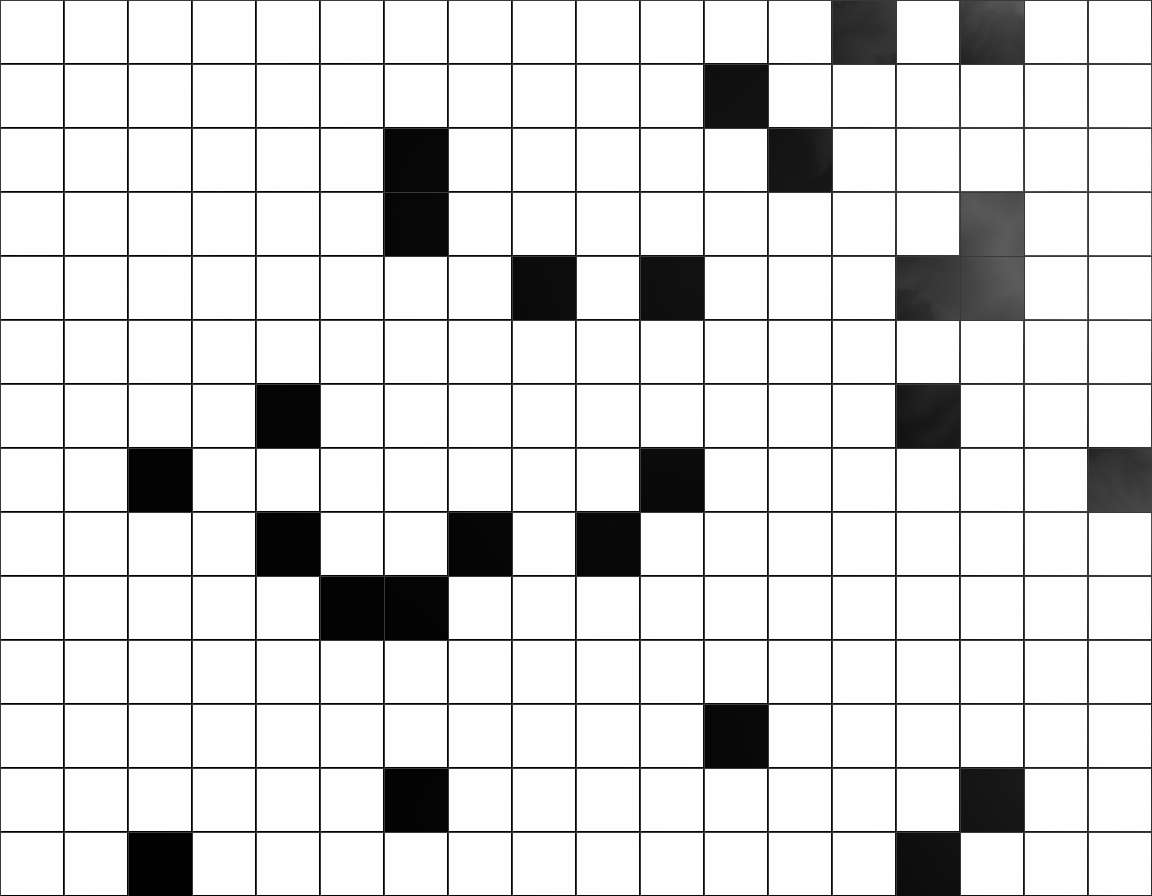

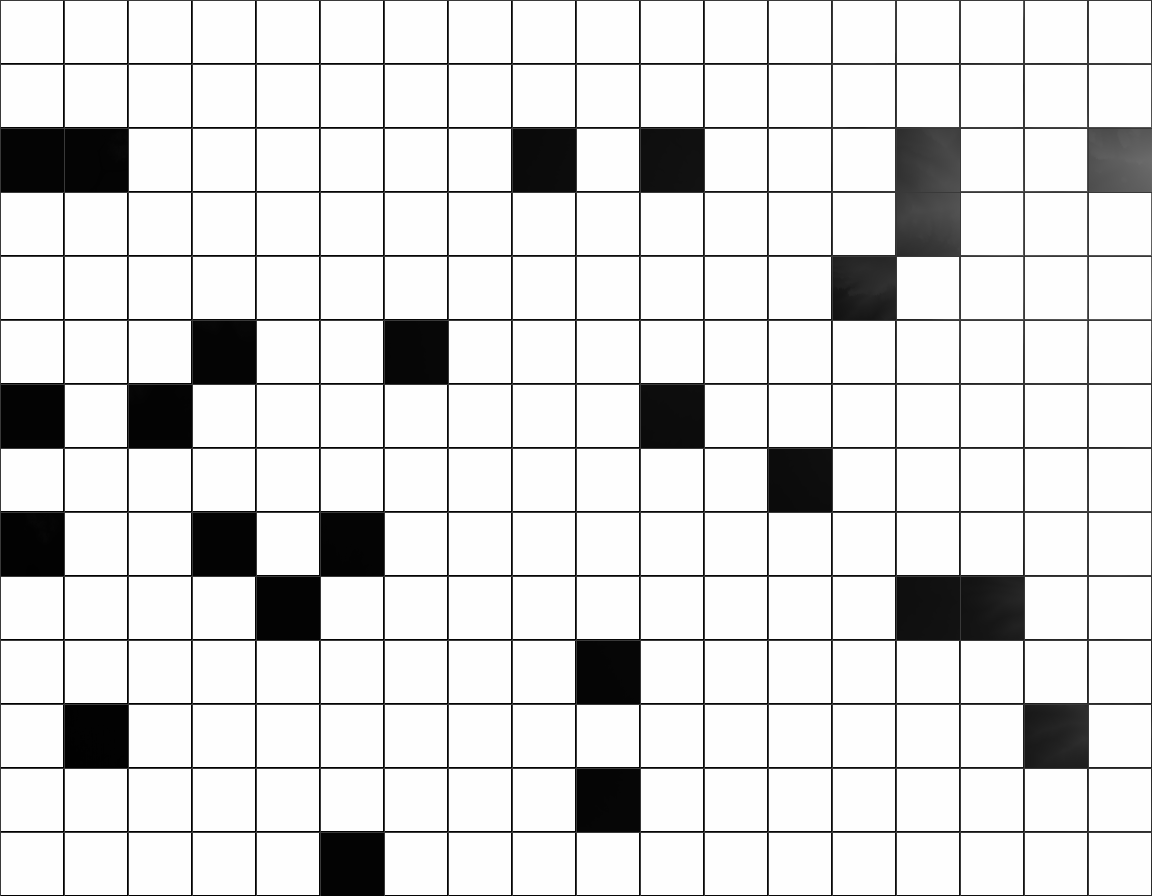

In [31]:
img = cv2.merge([gray,gray,gray])
dx, dy = 64,64

# Custom (rgb) grid color
grid_color = [0, 0, 0]

# Modify the image to include the grid
a, b = img.shape[:2]
a -= a%64
b -= b%64
img[:,::dy, :] = grid_color
img[::dx,:, :] = grid_color
img = img[:a, :b]
ims = img.copy()
for (x, y) in np.concatenate((test_coords, validate_coords)):
    ims[x+1:x+63,  y+1:y+63] = [255, 255, 255]
imshow(ims)
ims = img.copy()
for (x, y) in np.concatenate((train_coords, validate_coords)):
    ims[x+1:x+63,  y+1:y+63] = [255, 255, 255]
imshow(ims)
ims = img.copy()
for (x, y) in np.concatenate((train_coords, test_coords)):
    ims[x+1:x+63,  y+1:y+63] = [255, 255, 255]
imshow(ims)
ims = img.copy()